In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Preprocess the data
# Step 1 normalise data
numeric_cols = data.select_dtypes(include=["int64","float64"]).columns
data[numeric_cols]=data[numeric_cols].apply(lambda x: (x-x.mean())/x.std())
print(data)

       symbol        date      open      high       low     close    volume
0         AAL  2014-01-02 -0.603937 -0.599270 -0.601490 -0.601238  0.576440
1        AAPL  2014-01-02 -0.068684 -0.073862 -0.066544 -0.072439  6.625051
2         AAP  2014-01-02  0.236596  0.241882  0.236028  0.230318 -0.450782
3        ABBV  2014-01-02 -0.337359 -0.340161 -0.338393 -0.338901  0.038319
4         ABC  2014-01-02 -0.160068 -0.165206 -0.159812 -0.162400 -0.377207
...       ...         ...       ...       ...       ...       ...       ...
497467    XYL  2017-12-29 -0.175639 -0.179183 -0.175324 -0.179054 -0.389563
497468    YUM  2017-12-29 -0.036585 -0.043226 -0.039400 -0.046900 -0.353006
497469    ZBH  2017-12-29  0.348845  0.340306  0.348684  0.338032 -0.392363
497470   ZION  2017-12-29 -0.345638 -0.347785 -0.345452 -0.350234 -0.363416
497471    ZTS  2017-12-29 -0.136022 -0.140478 -0.134358 -0.141212 -0.309699

[497472 rows x 7 columns]


In [47]:
data.describe()

,open,high,low,close,volume
count,4.974610e+05,4.974640e+05,4.974640e+05,4.974720e+05,4.974720e+05
mean,2.605290e-17,1.608871e-16,-6.810277e-17,-1.553998e-17,-2.948026e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.350374e-01,-8.351172e-01,-8.357529e-01,-8.354890e-01,-5.167078e-01
25%,-4.401472e-01,-4.402468e-01,-4.402113e-01,-4.401722e-01,-3.854945e-01
50%,-2.107225e-01,-2.108506e-01,-2.107842e-01,-2.107872e-01,-2.634448e-01
75%,1.188290e-01,1.182406e-01,1.195925e-01,1.187605e-01,2.225072e-03
max,1.929264e+01,1.936094e+01,1.938490e+01,1.934152e+01,7.458377e+01


In [48]:
# NOW I have made the std 1 and mean of each numeric columns very close to 1 and 0 respectively
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  float64
dtypes: float64(5), object(2)
memory usage: 26.6+ MB


In [87]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [229]:
#creating regressor
from sklearn.preprocessing import StandardScaler
# Splitting data into training and test sets
trainSize = 0.8
testSize = 0.2
df =pd.read_csv("Data/stockPrices.csv")
# Creating new columns
df['Price Range'] = df['high'] - df['low']
df['Price Change'] = df['close'] - df['open']
df['Percentage Change'] = (df['Price Change'] / df['open']) * 100
df['VWAP'] = (df['close'] * df['volume']).cumsum() / df['volume'].cumsum()
df['date'] = pd.to_datetime(df['date'])
df['year'] = df.date.dt.year
df['day']  = df.date.dt.day
df['log_volume'] = np.log(df['volume'] + 1)
df = df.dropna()  # Dropping missing values

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497461 entries, 0 to 497471
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   symbol             497461 non-null  object        
 1   date               497461 non-null  datetime64[ns]
 2   open               497461 non-null  float64       
 3   high               497461 non-null  float64       
 4   low                497461 non-null  float64       
 5   close              497461 non-null  float64       
 6   volume             497461 non-null  int64         
 7   Price Range        497461 non-null  float64       
 8   Price Change       497461 non-null  float64       
 9   Percentage Change  497461 non-null  float64       
 10  VWAP               497461 non-null  float64       
 11  year               497461 non-null  int32         
 12  day                497461 non-null  int32         
 13  log_volume         497461 non-null  float64      

In [282]:
# Determine split index for training and test sets
split_idx = int(trainSize * len(df))

# Features to scale
features_to_scale = ['VWAP', 'volume', 'Percentage Change']

# Splitting the data into training and test sets
X_train = df.iloc[:split_idx, [2, 3, 4, 13, 7,10,11]].values  # Features for training
y_train = df.iloc[:split_idx, 5].values  # Target (close price) for training

X_test = df.iloc[split_idx:, [2, 3, 4, 13, 7,10,11]].values  # Features for test
y_test = df.iloc[split_idx:, 5].values  # Target (close price) for test

# Step 1: Feature Scaling (scale the training data, then apply same transformation to the test data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Only transform the test data (no fitting)

# Step 2: Initialize parameters (slopes and intercept)
n_samples, n_features = X_train.shape
m = np.zeros(n_features)  # Initialize slopes for each feature to 0
b = 0  # Initialize intercept to 0

L = 0.001
n_iter =  20000
lambda_=0.01

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497461 entries, 0 to 497471
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   symbol             497461 non-null  object        
 1   date               497461 non-null  datetime64[ns]
 2   open               497461 non-null  float64       
 3   high               497461 non-null  float64       
 4   low                497461 non-null  float64       
 5   close              497461 non-null  float64       
 6   volume             497461 non-null  int64         
 7   Price Range        497461 non-null  float64       
 8   Price Change       497461 non-null  float64       
 9   Percentage Change  497461 non-null  float64       
 10  VWAP               497461 non-null  float64       
 11  year               497461 non-null  int32         
 12  day                497461 non-null  int32         
 13  log_volume         497461 non-null  float64      

In [81]:
def pred(X,m,b):
    return np.dot(X,m) + b

In [82]:
def mse(y,y_hat):
    return np.mean((y-y_hat)**2)

In [284]:
loss_history = []

In [266]:
# slope_hist=[]
# bias_hist=[]


In [292]:
slope_hist.append(m)
bias_hist.append(b)
slope_hist,bias_hist

([array([30.4877593 , 30.32696052, 30.84528725, -0.47014569,  1.9690445 ,
         -0.16429703,  0.1902611 ]),
  array([28.95834994, 28.8243003 , 29.19737722, -1.61819669,  6.89969835,
         -0.30766213,  0.33792783]),
  array([ 3.07871599e+01,  3.07999270e+01,  3.13597098e+01, -1.82441370e-01,
          6.00245098e-01, -2.53407356e-02,  5.50298519e-02]),
  array([ 3.07871599e+01,  3.07999270e+01,  3.13597098e+01, -1.82441370e-01,
          6.00245098e-01, -2.53407356e-02,  5.50298519e-02])],
 [array([30.4877593 , 30.32696052, 30.84528725, -0.47014569,  1.9690445 ,
         -0.16429703,  0.1902611 ]),
  array([28.95834994, 28.8243003 , 29.19737722, -1.61819669,  6.89969835,
         -0.30766213,  0.33792783]),
  array([ 3.07871599e+01,  3.07999270e+01,  3.13597098e+01, -1.82441370e-01,
          6.00245098e-01, -2.53407356e-02,  5.50298519e-02]),
  np.float64(82.90704817799067)])

In [286]:
for i in range(n_iter):
    y_pred = pred(X_train,m,b)
    m_grad = -(2/n_samples)*np.dot(X_train.T,(y_train-y_pred)) +2*lambda_*m
    b_grad = -(2/n_samples)*np.sum((y_train-y_pred))
    # updationg step
    m-=L*m_grad
    b-=L*b_grad
    if i%1000 ==0:
        print(f"{i}.slope={m} bias={b}")
    loss = mse(y_pred,y_train)
    loss_history.append(loss)

    

0.slope=[ 0.18754959  0.1875632   0.18756369 -0.05801533  0.14690867  0.00813167
  0.00853209] bias=0.16581409635598846
1000.slope=[27.27947098 27.19700753 27.41849026 -3.31240069 11.9963089  -0.18530693
  0.37999717] bias=71.73164291010846
2000.slope=[28.96022083 28.82611107 29.19935925 -1.61640287  6.89391852 -0.30776287
  0.33792328] bias=81.3976474023392
3000.slope=[29.85169748 29.69557987 30.15276287 -0.92180481  4.04732157 -0.26183312
  0.28420956] bias=82.70318168304973
4000.slope=[30.33145976 30.16977026 30.67295889 -0.57991128  2.48520831 -0.19628385
  0.22102609] bias=82.87951304721155
5000.slope=[30.58874104 30.43037429 30.95874347 -0.3989678   1.63103944 -0.1405768
  0.1674331 ] bias=82.90332915870468
6000.slope=[30.72506148 30.57475185 31.11691965 -0.30091191  1.16419548 -0.09981385
  0.12794235] bias=82.90654587042988
7000.slope=[30.79549224 30.65570093 31.20545084 -0.24736971  0.9089388  -0.07211168
  0.10095069] bias=82.90698033406291
8000.slope=[30.83002145 30.70197122

In [287]:
len(loss_history)

20000

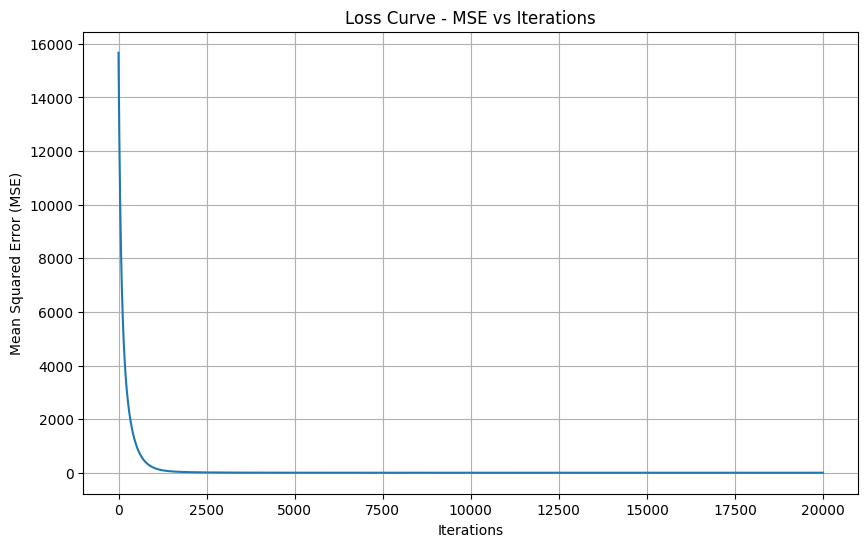

In [289]:
plt.figure(figsize=(10, 6))
plt.plot(range(n_iter), loss_history)
plt.title('Loss Curve - MSE vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [176]:
def sample_predict(new_data, m, b):
    """
    new_data: array-like, shape (n_features,)
    Returns predicted closing price based on the learned model.
    """
    return np.dot(new_data, m) + b
sample = df.iloc[0][['open', 'high', 'low', 'volume', 'Price Range', 'Price Change', 'Percentage Change', 'VWAP', 'year']].values
predicted_close = sample_predict(sample, m, b)
print(f'Predicted Closing Price: {predicted_close} actual:{df.iloc[0]["close"]}')

Predicted Closing Price: 284.08615473376705 actual:25.36


In [290]:
y_test_pred = sample_predict(X_test, m, b)
test_loss = mse(y_test, y_test_pred)

In [291]:
test_loss,y_test.mean()

(np.float64(1.7642111951496537), np.float64(100.2145978541204))

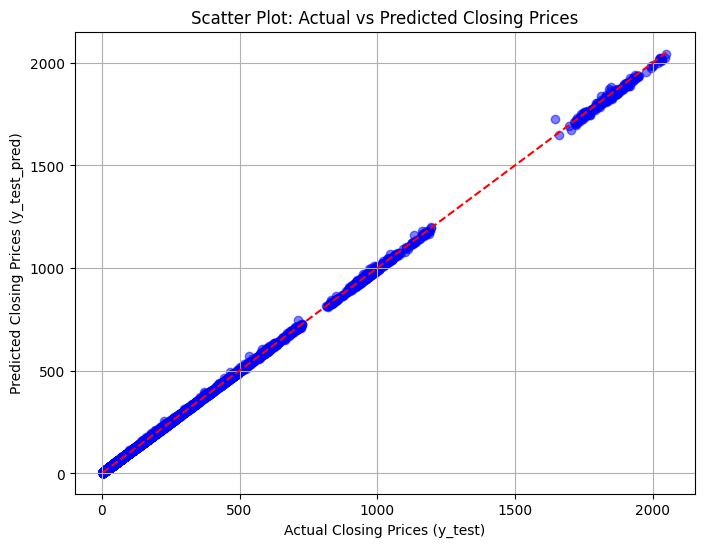

In [293]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)

# Plot a 45-degree line to show where perfect predictions would lie
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Closing Prices (y_test)')
plt.ylabel('Predicted Closing Prices (y_test_pred)')
plt.title('Scatter Plot: Actual vs Predicted Closing Prices')

# Display the plot
plt.grid(True)
plt.show()

# THE END

In [179]:
test_loss

np.float64(1418932968.1963243)

In [106]:
X

array([[-6.03937452e-01, -5.99270126e-01, -6.01490423e-01, ...,
        -4.46951344e-01, -6.01238146e-01,  2.01400000e+03],
       [-6.86842464e-02, -7.38618892e-02, -6.65437385e-02, ...,
         5.46700893e+00, -1.14766663e-01,  2.01400000e+03],
       [ 2.36596380e-01,  2.41881919e-01,  2.36027709e-01, ...,
        -2.65364141e+00, -1.37809861e-01,  2.01400000e+03],
       ...,
       [ 3.48844948e-01,  3.40306287e-01,  3.48684487e-01, ...,
        -3.09965115e+00, -1.10000612e+05,  2.01700000e+03],
       [-3.45637631e-01, -3.47784626e-01, -3.45452290e-01, ...,
         1.32980861e+00, -2.39080297e+05,  2.01700000e+03],
       [-1.36021561e-01, -1.40477691e-01, -1.34357551e-01, ...,
         3.81560790e+00,  3.09210174e+15,  2.01700000e+03]])

In [109]:
X_test =df[['open', 'high', 'low', 'volume', 'Price Range', 'Price Change', 'Percentage Change', 'VWAP', 'year']]
X_test.describe()

,open,high,low,volume,Price Range,Price Change,Percentage Change,VWAP,year
count,4.974610e+05,497461.000000,497461.000000,497461.000000,4.974610e+05,497461.000000,497461.000000,4.974610e+05,497461.000000
mean,4.433563e-17,0.000002,0.000001,0.000010,3.583225e-08,-0.000005,0.184407,6.215767e+09,2015.512573
std,1.000000e+00,1.000003,1.000003,1.000009,1.375694e-02,0.015775,409.079607,4.384037e+12,1.117420
min,-8.350374e-01,-0.835117,-0.835753,-0.516696,-2.410590e-01,-0.995503,-110477.657295,-8.137988e+05,2014.000000
25%,-4.401472e-01,-0.440247,-0.440211,-0.385492,-4.569222e-03,-0.003911,-1.239289,-1.389604e+01,2015.000000
50%,-2.107225e-01,-0.210851,-0.210747,-0.263431,-1.528877e-03,0.000038,-0.005671,-9.054323e+00,2016.000000
75%,1.188290e-01,0.118241,0.119593,0.002234,2.107500e-03,0.004078,1.241081,1.073276e+01,2017.000000
max,1.929264e+01,19.360938,19.384896,74.583775,7.960145e-01,0.521523,133934.861468,3.092102e+15,2017.000000


In [116]:
from sklearn.preprocessing import StandardScaler
features_to_scale = ['VWAP', 'volume',"Percentage Change"]  # Columns that are not already standardized

scaler = StandardScaler()
df.loc[:, features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [117]:
df.describe()

,date,open,high,low,close,volume,Price Range,Price Change,Percentage Change,VWAP,year
count,497461,4.974610e+05,497461.000000,497461.000000,497461.000000,4.974610e+05,4.974610e+05,497461.000000,4.974610e+05,497461.000000,4.974610e+05
mean,2016-01-06 17:16:56.524310016,4.433563e-17,0.000002,0.000001,-0.000005,4.570683e-18,3.583225e-08,-0.000005,-8.570031e-20,0.000000,8.104553e-14
min,2014-01-02 00:00:00,-8.350374e-01,-0.835117,-0.835753,-0.835489,-5.167018e-01,-2.410590e-01,-0.995503,-2.700647e+02,-0.001418,-1.353631e+00
25%,2015-01-08 00:00:00,-4.401472e-01,-0.440247,-0.440211,-0.440209,-3.854997e-01,-4.569222e-03,-0.003911,-3.480247e-03,-0.001418,-4.587113e-01
50%,2016-01-11 00:00:00,-2.107225e-01,-0.210851,-0.210747,-0.210787,-2.634388e-01,-1.528877e-03,0.000038,-4.646496e-04,-0.001418,4.362080e-01
75%,2017-01-06 00:00:00,1.188290e-01,0.118241,0.119593,0.118761,2.223503e-03,2.107500e-03,0.004078,2.583054e-03,-0.001418,1.331127e+00
max,2017-12-29 00:00:00,1.929264e+01,19.360938,19.384896,19.341523,7.458320e+01,7.960145e-01,0.521523,3.274053e+02,705.308443,1.331127e+00
std,NaN,1.000000e+00,1.000003,1.000003,0.999991,1.000001e+00,1.375694e-02,0.015775,1.000001e+00,1.000001,1.000001e+00


In [148]:
newData = pd.read_csv("Data/stockPrices.csv")

In [149]:
closeStd = newData.close.std()
closeMean = newData.close.mean()
closeStd,closeMean

(np.float64(101.47240737650567), np.float64(86.36908207456902))

In [151]:
newData.iloc[0,:]

symbol           AAL
date      2014-01-02
open           25.07
high           25.82
low            25.06
close          25.36
volume       8998943
Name: 0, dtype: object

In [230]:
x_dev = df.iloc[:,1:]
x_dev.corr()

,date,open,high,low,close,volume,Price Range,Price Change,Percentage Change,VWAP,year,day,log_volume
date,1.000000,0.077339,0.077048,0.077732,0.077419,-0.009681,0.029278,0.005053,0.003858,0.820659,0.968702,0.019933,-0.002534
open,0.077339,1.000000,0.999941,0.999928,0.999876,-0.148724,0.780851,-0.007707,-0.007499,0.065075,0.073364,0.002511,-0.306034
high,0.077048,0.999941,1.000000,0.999905,0.999938,-0.148345,0.784568,-0.000014,-0.002487,0.065092,0.073103,0.002391,-0.305190
low,0.077732,0.999928,0.999905,1.000000,0.999941,-0.149285,0.775964,0.001038,-0.002230,0.065092,0.073715,0.002695,-0.307178
close,0.077419,0.999876,0.999938,0.999941,1.000000,-0.148839,0.780101,0.008068,0.002463,0.065119,0.073474,0.002412,-0.306225
volume,-0.009681,-0.148724,-0.148345,-0.149285,-0.148839,1.000000,-0.073386,-0.007336,-0.008681,-0.005294,-0.004902,-0.002049,0.678290
Price Range,0.029278,0.780851,0.784568,0.775964,0.780101,-0.073386,1.000000,-0.047427,-0.013526,0.050781,0.029477,-0.011851,-0.148547
Price Change,0.005053,-0.007707,-0.000014,0.001038,0.008068,-0.007336,-0.047427,1.000000,0.631452,0.002770,0.007024,-0.006268,-0.012194
Percentage Change,0.003858,-0.007499,-0.002487,-0.002230,0.002463,-0.008681,-0.013526,0.631452,1.000000,0.001499,0.005756,-0.003910,-0.009299
VWAP,0.820659,0.065075,0.065092,0.065092,0.065119,-0.005294,0.050781,0.002770,0.001499,1.000000,0.763127,0.020663,0.004710
